In [3]:
import cv2
import random
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
image_gray = cv2.imread('E:/lenna.jpg', 0)


cv2.imshow('lenna', image_gray)
cv2.waitKey()
cv2.destroyAllWindows()
# to show  the image data matrix
print(image_gray)
# show the image data type
print(image_gray.dtype)
# shoe the image shape 
print(image_gray.shape)


[[161 162 163 ... 169 154 127]
 [162 162 162 ... 171 157 130]
 [162 162 162 ... 169 156 128]
 ...
 [ 44  41  53 ... 102 100 100]
 [ 43  41  57 ... 104 106 106]
 [ 44  42  57 ... 102 108 109]]
uint8
(512, 512)


In [11]:
import cv2
import random
import numpy as np
from matplotlib import pyplot as plt
# show the R G B Channels
image_gray = cv2.imread('E:/lenna.jpg')
cv2.imshow('lenna', image_gray)
cv2.waitKey()
cv2.destroyAllWindows()
print(image_gray)
print(image_gray.shape)

# image crop
image_crop = image_gray[0:100, 0:200]
cv2.imshow('image_crop', image_crop)
cv2.waitKey()
cv2.destroyAllWindows()

# color split 
B, G, R = cv2.split(image_gray)
cv2.imshow('B', B)
cv2.imshow('G', G)
cv2.imshow('R', R)
cv2.waitKey()
cv2.destroyAllWindows()

#change color

def random_light_color(img):
    # brightness
    B, G, R = cv2.split(img)
    b_rand = random.randint(-50, 50)
    if b_rand == 0:
        pass
    elif b_rand > 0:
        lim = 255 - b_rand
        B[B > lim] = 255
        B[B <= lim] = (b_rand + B[B <= lim]).astype(img.dtype)
    elif b_rand < 0:
        lim = 0 - b_rand
        B[B < lim] = 0
        B[B >= lim] = (b_rand + B[B >= lim]).astype(img.dtype)
        
    g_rand = random.randint(-50, 50)
    if g_rand == 0:
        pass
    elif g_rand > 0:
        lim = 255 - g_rand 
        G[G > lim] = 255
        G[G <= lim] = (g_rand + G[G <= lim]).astype(img.dtype)
    elif g_rand < 0:
        lim = 0 - g_rand
        G[G < lim] = 0
        G[G >= lim] = (g_rand + G[G >= lim]).astype(img.dtype)
    
    r_rand = random.randint(-50, 50)
    if r_rand == 0:
        pass
    elif r_rand > 0:
        lim = 255 - r_rand
        R[R > lim] = 255
        R[R <= lim] = (r_rand + R[R <= lim]).astype(img.dtype)
    elif r_rand < 0:
        lim = 0 - r_rand
        R[R < lim] = 0
        R[R >= lim] = (r_rand + R[R >= lim]).astype(img.dtype)
    img_merge = cv2.merge((B, G, R))
    return img_merge

img_random_color = random_light_color(image_gray)
cv2.imshow('img_random_color', img_random_color)
cv2.waitKey()
cv2.destroyAllWindows()





[[[126 136 223]
  [127 137 224]
  [128 138 226]
  ...
  [119 146 233]
  [ 99 132 218]
  [ 70 105 191]]

 [[127 137 224]
  [127 137 224]
  [127 137 225]
  ...
  [123 147 235]
  [106 134 221]
  [ 77 107 194]]

 [[125 137 225]
  [125 137 225]
  [125 137 225]
  ...
  [126 144 233]
  [113 131 220]
  [ 84 104 192]]

 ...

 [[ 56  22  83]
  [ 53  19  80]
  [ 64  30  94]
  ...
  [ 81  70 174]
  [ 77  66 176]
  [ 75  66 176]]

 [[ 55  21  82]
  [ 53  19  80]
  [ 68  34  98]
  ...
  [ 83  71 177]
  [ 81  72 183]
  [ 79  72 183]]

 [[ 56  22  83]
  [ 54  20  81]
  [ 68  34  98]
  ...
  [ 79  69 176]
  [ 83  74 185]
  [ 82  74 188]]]
(512, 512, 3)


(250, 187, 3)


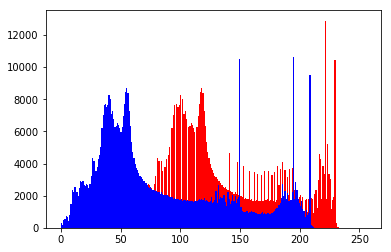

In [11]:
# gamma correction
import cv2
import random
import numpy as np
from matplotlib import pyplot as plt
# show the R G B Channels
image_dark = cv2.imread('E:/dark.jpg')
cv2.imshow('dark', image_dark)
cv2.waitKey()
cv2.destroyAllWindows()



def adjust_gamma(img, gamma=1):
    invgamma = 1.0 / gamma
    table = []
    for i in range(256):
        table.append(((i / 255) ** invgamma) * 255)
    table = np.array(table).astype('uint8')
    return cv2.LUT(image_dark,table)
image_brighter = adjust_gamma(image_dark, 2)
cv2.imshow('image_brighter', image_brighter)
cv2.waitKey()
cv2.destroyAllWindows()
image_darker = adjust_gamma(image_dark, 0.5)
cv2.imshow('image_darker', image_darker)
cv2.waitKey()
cv2.destroyAllWindows()

# histogram.
image_small_brighter = cv2.resize(image_brighter, (int(image_brighter.shape[0]*0.5), int(image_brighter.shape[1]*0.5)))
plt.hist(image_brighter.flatten(), 256, [0,255], color='r')
plt.hist(image_dark.flatten(), 256, [0,255], color='b')
img_yuv = cv2.cvtColor(image_small_brighter, cv2.COLOR_BGR2YUV)
print(img_yuv.shape)
#equalize the histogram of the Y channel
img_yuv[:, :, 0] = cv2.equalizeHist(img_yuv[:,:,0])
#convert the YUV to the BGR format
img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)

'''
cv2.imshow('img_yuv',img_yuv)
cv2.waitKey()
cv2.destroyAllWindows()
cv2.imshow('image_small_brighter',image_small_brighter)
cv2.waitKey()
cv2.destroyAllWindows()
cv2.imshow('img_output',img_output)
cv2.waitKey()
cv2.destroyAllWindows()
'''



In [21]:
# rotation
import cv2
import random
import numpy as np
from matplotlib import pyplot as plt
image = cv2.imread('E:/lenna.jpg',1)
cv2.imshow('lenna_origin', image)
cv2.waitKey()
cv2.destroyAllWindows()
M = cv2.getRotationMatrix2D((image.shape[0] / 2, image.shape[1] / 2), 30, 1)# center, angle , scale
print(M)
image_rotation = cv2.warpAffine(image, M, (image.shape[0], image.shape[1]))
cv2.imshow('rotated lenna', image_rotation)
cv2.waitKey()
cv2.destroyAllWindows()

#将最后一列变为0 ，实际上就是不是以中心点为原点旋转了，而是按照默认的图像左上角为原点进行旋转，最后一列实际上就是一个平移的作用
M_2 = M
M_2[0][2] = 0;
M_2[1][2] = 0;
image_rotation_2 = cv2.warpAffine(image, M, (image.shape[0], image.shape[1]))
cv2.imshow('rotated lenna 2', image_rotation_2)
cv2.waitKey()
cv2.destroyAllWindows()
#上述操作其实就是和下述操作实现的结果一样
M_3 = cv2.getRotationMatrix2D((0,0), 30, 1)
print(M_3)
image_rotation_3 = cv2.warpAffine(image, M_3, (image.shape[0], image.shape[1]))
cv2.imshow('rotated lenna 3', image_rotation_3)
cv2.waitKey()
cv2.destroyAllWindows()

# scale+rotation+translation = similarity transform

M_4 = cv2.getRotationMatrix2D((image.shape[0]/2, image.shape[1]/2), 30, 0.5)
image_sim_trans = cv2.warpAffine(image, M_4, (image.shape[0], image.shape[1]))
cv2.imshow('similarity transform lenna', image_sim_trans)
cv2.waitKey()
cv2.destroyAllWindows()

# Affine Transform
(rows, cols, ch) = image.shape
pt1 = np.float32([[0,0], [cols - 1, 0], [0, rows - 1]])
pt2 = np.float32([[cols*0.2, rows*0.1], [cols * 0.9, rows * 0.2], [cols * 0.1, rows * 0.9]])

M_5 = cv2.getAffineTransform(pt1, pt2)
dst = cv2.warpAffine(image, M_5, (cols, rows))
cv2.imshow('affine lenna', dst)
cv2.waitKey()
cv2.destroyAllWindows()

# perspective Transform
def random_warp(img, row, col):
    height, width, channels = img.shape
    random_margin = 60
    x1 = random.randint(-random_margin, random_margin)
    y1 = random.randint(-random_margin, random_margin)
    x2 = random.randint(width - random_margin - 1, width - 1)
    y2 = random.randint(-random_margin, random_margin)
    x3 = random.randint(width - random_margin - 1, width - 1)
    y3 = random.randint(height - random_margin - 1, height - 1)
    x4 = random.randint(-random_margin, random_margin)
    y4 = random.randint(height - random_margin - 1, height - 1)
    
    dx1 = random.randint(-random_margin, random_margin)
    dy1 = random.randint(-random_margin, random_margin)
    dx2 = random.randint(width - random_margin - 1, width - 1)
    dy2 = random.randint(-random_margin, random_margin)
    dx3 = random.randint(width - random_margin - 1, width - 1)
    dy3 = random.randint(height - random_margin - 1, height - 1)
    dx4 = random.randint(-random_margin, random_margin)
    dy4 = random.randint(height - random_margin - 1, height - 1)
    
    pts1 = np.float32([[x1, y1], [x2, y2], [x3, y3], [x4, y4]])
    pts2 = np.float32([[dx1, dy1], [dx2, dy2], [dx3, dy3], [dx4, dy4]])
    M_5 = cv2.getPerspectiveTransform(pts1, pts2)
    img_warp = cv2.warpPerspective(image, M_5, (width, height))
    return M_5, img_warp
M_5, img_warp = random_warp(image, image.shape[0], image.shape[1])
cv2.imshow('lenna_warp', img_warp)
cv2.waitKey()
cv2.destroyAllWindows()

[[  0.8660254    0.5        -93.70250337]
 [ -0.5          0.8660254  162.29749663]]
[[ 0.8660254  0.5        0.       ]
 [-0.5        0.8660254  0.       ]]
